## Implementation of algorithm Manifold Sampling

- Larson J, Menickelly M, Zhou B. Manifold Sampling for Optimizing Nonsmooth Nonconvex Compositions[J]. arXiv preprint arXiv:2011.01283, 2020.

In [1]:
import torch
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import time

In [1025]:
# function for computing Jacobian matrix
def Jacobian(fun, x, noutputs):
    # x is input variable in form of tensor
    # fun is function defined
    # noutputs is output dimension
    x=x.numpy()
    x_size = list(x.size())
    x = x.unsqueeze(0).repeat(noutputs, *([1]*(len(x_size))) ).detach().requires_grad_(True)
    y = fun(x)
    y.backward(torch.eye(noutputs))
    return x.grad.view(noutputs,*x_size)




In [18]:
def Gradient(fun, x):
    # x is input variable in form of tensor
    # fun is function defined
    
    y = fun(x)
    y.backward()
    return x.grad



In [624]:
def torch_optimize(cov_tol):
    time_start=time.time()
    dtype = torch.double
    device = torch.device("cpu")

    x1 = torch.randn((), device=device, dtype=dtype, requires_grad=True)
    x2 = torch.randn((), device=device, dtype=dtype, requires_grad=True)
    x3 = torch.randn((), device=device, dtype=dtype, requires_grad=True)
    save=1e5

    learning_rate = 1e-3
    for t in range(16000):
        # Forward pass: compute predicted y using operations on Tensors.
        
        hF=abs((x1**2-x2)**2-(1-x1)**2)+abs(x3)+x1**2+x2**2+x3**2
        if abs(hF-save)<cov_tol:
            break
        else:
            save=hF
        # Compute and print loss using operations on Tensors.
        # Now loss is a Tensor of shape (1,)
        # loss.item() gets the scalar value held in the loss.
        #if t % 1000 == 999:
            #print(t, loss.item())

        # Use autograd to compute the backward pass. This call will compute the
        # gradient of loss with respect to all Tensors with requires_grad=True.
        # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
        # the gradient of the loss with respect to a, b, c, d respectively.
        hF.backward()

        # Manually update weights using gradient descent. Wrap in torch.no_grad()
        # because weights have requires_grad=True, but we don't need to track this
        # in autograd.
        with torch.no_grad():
            x1 -= learning_rate * x1.grad
            x2 -= learning_rate * x2.grad
            x3 -= learning_rate * x3.grad

            # Manually zero the gradients after updating weights
            x1.grad = None
            x2.grad = None
            x3.grad = None
    time_end=time.time()
    print(x1,x2,x3,hF)
    return time_end-time_start,float(hF)

In [427]:
torch_optimize(1e-7)

tensor(0.4534, dtype=torch.float64, requires_grad=True) tensor(0.1028, dtype=torch.float64, requires_grad=True) tensor(0.0051, dtype=torch.float64, requires_grad=True) tensor(0.5305, dtype=torch.float64, grad_fn=<AddBackward0>)


(0.4690532684326172, 0.5305490148139647)

## Simulation

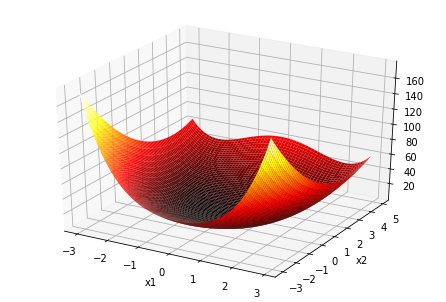

In [1]:
#画出问题
from mpl_toolkits.mplot3d import Axes3D #二维图像必须用到的库
import numpy as np
from matplotlib import pyplot as plt
 
def func2(x):#构建函数
    return x[0]**2+x[1]**2+abs((x[1]-x[0]**2)**2+(1-x[1])**2)
 
 
fig = plt.figure()
ax = Axes3D(fig)
x1=np.arange(-3,3,0.1)
x2=np.arange(-3,5,0.1)
x1, x2 = np.meshgrid(x1, x2)#网格的创建，这个是关键
y=func2([x1,x2])
plt.xlabel('x1')
plt.ylabel('x2')
ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap='hot')
 

plt.savefig("./Draft/function.png")
plt.show()

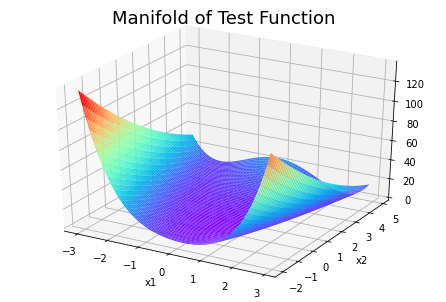

In [5]:
#画出问题
from mpl_toolkits.mplot3d import Axes3D #二维图像必须用到的库
import numpy as np
from matplotlib import pyplot as plt
 
def func4(x):#构建函数

    
    
    
    return (x[1]-x[0]**2)**2+(1-x[0])**2
 
fig = plt.figure()
ax = Axes3D(fig)
x1=np.arange(-3,3,0.1)
x2=np.arange(-2,5,0.1)
x1, x2 = np.meshgrid(x1, x2)#网格的创建，这个是关键
y=func4([x1,x2])
plt.xlabel('x1')
plt.ylabel('x2')
ax.plot_surface(x1, x2, y, rstride=1, cstride=1,cmap="rainbow")
 
plt.title('Manifold of Test Function', fontsize=18)
plt.savefig("./Draft/function3.png")
plt.show()

Text(0.5, 1.0, 'Contour Plot for Test Function')

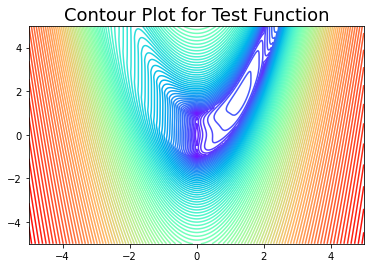

In [865]:
import math
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
def func4(x):#构建函数
    z1=(x[1]-x[0]**2)**2
    z2=(1-x[0])**2
    
    
    
    return np.log(-np.exp(-x[0]**2-x[1]**2)+abs(1-z1**2)+abs(1-z2**2)+1)
delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z=func4([X,Y])
plt.contour(X, Y, Z, 100, cmap='rainbow')
plt.title('Contour Plot for Test Function', fontsize=18)
plt.savefig("./Draft/contourtry.png")

In [380]:
import pandas as pd

In [617]:
#创建一个空的Dataframe
result =pd.DataFrame(columns=('idx','npt','timeused','value'))

for i in [6,8,10,12,14,16,18,20]:
    print(i)
    npt=i
    for j in range(10):

        timeused,value=MS_optimize(func=Rosenbrockneg,nsample=i,ifprintresult=0)
        result=result.append(pd.DataFrame({'idx':[j],'npt':[i],'timeused':[timeused],'value':[value]}),ignore_index=True)

 


6
0
1
2
3
4
5
6
7
8
9
8
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
12
0
1
2
3
4
5
6
7
8
9
14
0
1
2
3
4
5
6
7
8
9
16
0
1
2
3
4
5
6
7
8
9
18
0
1
2
3
4
5
6
7
8
9
20
0
1
2
3
4
5
6
7
8
9


In [393]:
import seaborn as sns


In [615]:
result=result[result["timeused"]<10]

<Figure size 800x640 with 0 Axes>

Text(0.5, 1.0, 'Density Plot of Time Used to Converge by MF wrt Number of Points')

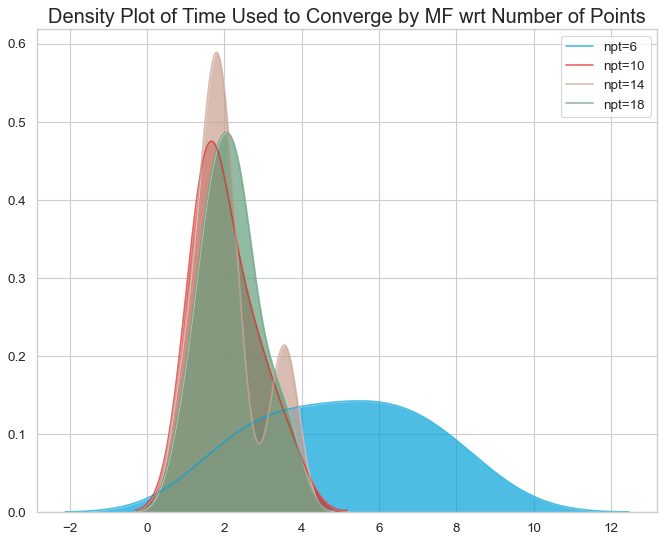

In [620]:
# time wrt points
# Import Data
df = result

# Draw Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(df.loc[df['npt'] == 6, "timeused"],
            shade=True,
            color="#01a2d9",
            label="npt=6",
            alpha=.7)
sns.kdeplot(df.loc[df['npt'] == 10, "timeused"],
            shade=True,
            color="#dc2624",
            label="npt=10",
            alpha=.7)
sns.kdeplot(df.loc[df['npt'] == 14, "timeused"],
            shade=True,
            color="#C89F91",
            label="npt=14",
            alpha=.7)
sns.kdeplot(df.loc[df['npt'] == 18, "timeused"],
            shade=True,
            color="#649E7D",
            label="npt=18",
            alpha=.7)

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Density Plot of Time Used to Converge by MF wrt Number of Points', fontsize=18)
plt.legend()
plt.savefig("./Draft/npttime2.png")
plt.show()

<Figure size 800x640 with 0 Axes>

Text(0.5, 1.0, 'Density Plot of Optimum by MF wrt Number of Points')

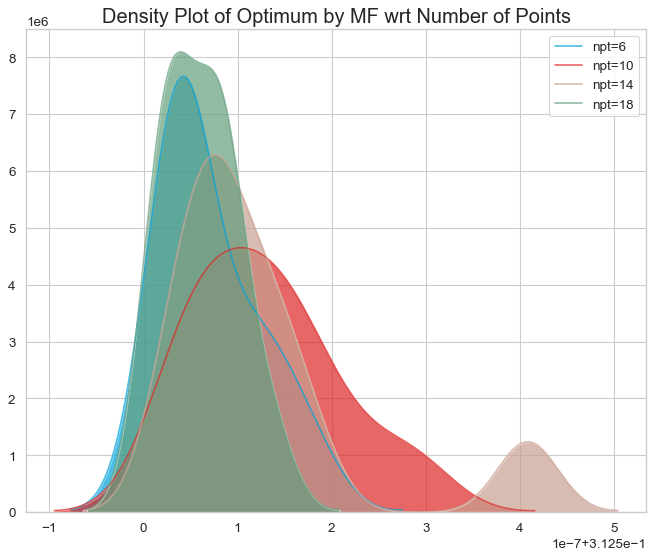

In [611]:
# time wrt points
# Import Data
df = result

# Draw Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(df.loc[df['npt'] == 6, "value"],
            shade=True,
            color="#01a2d9",
            label="npt=6",
            alpha=.7)
sns.kdeplot(df.loc[df['npt'] == 10, "value"],
            shade=True,
            color="#dc2624",
            label="npt=10",
            alpha=.7)
sns.kdeplot(df.loc[df['npt'] == 14, "value"],
            shade=True,
            color="#C89F91",
            label="npt=14",
            alpha=.7)
sns.kdeplot(df.loc[df['npt'] == 18, "value"],
            shade=True,
            color="#649E7D",
            label="npt=18",
            alpha=.7)

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Density Plot of Optimum by MF wrt Number of Points', fontsize=18)
plt.legend()
plt.savefig("./Draft/nptvalue2.png")
plt.show()

In [625]:
def objfun(x):
    return np.array(h(Rosenbrockneg(x))+phitest(x)).reshape(1,)

In [628]:
def dfolssolve():
    time_start=time.time()
    soln = dfols.solve(objfun, np.random.rand(3))
    time_end=time.time()
    return time_end-time_start,soln.resid[0]
    

In [630]:
compare =pd.DataFrame(columns=('idx','method','timeused','value'))

for method in ["dfols","Torch","MF"]:
    for j in range(10):
        if method=="MF":
            timeused,value=MS_optimize(func=Rosenbrockneg,nsample=10)
            compare=compare.append(pd.DataFrame({'idx':[j],'method':["MF"],'timeused':[timeused],'value':[value]}),ignore_index=True)
        if method=="Torch":
            timeused,value=torch_optimize(1e-7)
            compare=compare.append(pd.DataFrame({'idx':[j],'method':["Torch"],'timeused':[timeused],'value':[value]}),ignore_index=True)
        if method=="dfols":
            timeused,value=dfolssolve()
            compare=compare.append(pd.DataFrame({'idx':[j],'method':["dfols"],'timeused':[timeused],'value':[value]}),ignore_index=True)

tensor(0.5014, dtype=torch.float64, requires_grad=True) tensor(-0.2496, dtype=torch.float64, requires_grad=True) tensor(0.0005, dtype=torch.float64, requires_grad=True) tensor(0.3130, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.4603, dtype=torch.float64, requires_grad=True) tensor(-0.3211, dtype=torch.float64, requires_grad=True) tensor(0.0005, dtype=torch.float64, requires_grad=True) tensor(0.3202, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.4976, dtype=torch.float64, requires_grad=True) tensor(-0.2478, dtype=torch.float64, requires_grad=True) tensor(0.0005, dtype=torch.float64, requires_grad=True) tensor(0.3137, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.3575, dtype=torch.float64, requires_grad=True) tensor(0.4787, dtype=torch.float64, requires_grad=True) tensor(0.0005, dtype=torch.float64, requires_grad=True) tensor(0.6472, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.4979, dtype=torch.float64, requires_grad=True) tensor(-0.2479, dtype=torch.f

In [631]:
compare["value"]=np.log(compare["value"]-0.3125)

In [632]:
compare

,idx,method,timeused,value
0,0,dfols,0.234938,-2.814675
1,1,dfols,0.119518,-2.328487
2,2,dfols,0.080525,-1.676883
3,3,dfols,0.088389,-2.889792
4,4,dfols,0.090562,-1.102646
5,5,dfols,0.076831,-1.252902
6,6,dfols,0.083214,-4.328906
7,7,dfols,0.157617,-4.246488
8,8,dfols,0.062840,-1.112975
9,9,dfols,0.081801,-1.136844


<Figure size 1040x800 with 0 Axes>

Text(0.5, 1.0, 'Running Time Comparison')

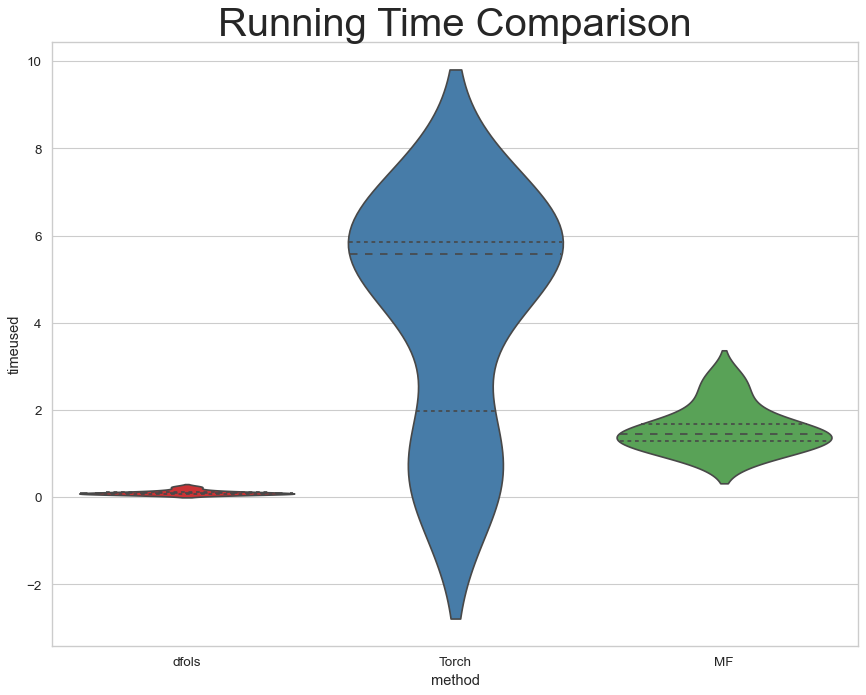

In [633]:

# Import Data
df = compare

# Draw Plot
plt.figure(figsize=(13, 10), dpi=80)
sns.violinplot(x='method',
               y='timeused',
               data=df,
               scale='width',
               palette='Set1',
               inner='quartile')

# Decoration
plt.title('Running Time Comparison', fontsize=36)
plt.savefig("./draft/timecompare2.png")
plt.show()


<Figure size 800x480 with 0 Axes>

Text(0.5, 1.0, 'Function Value Comparison')

Text(0.5, 0, 'value')

Text(0, 0.5, 'Frequency')

([<matplotlib.axis.XTick at 0x7fceec207df0>,
 [Text(0, 0, '-17.69619'),
  Text(0, 0, '-15.20011'),
  Text(0, 0, '-12.70404'),
  Text(0, 0, '-10.20796'),
  Text(0, 0, '-7.71188'),
  Text(0, 0, '-5.2158'),
  Text(0, 0, '-2.71972')])

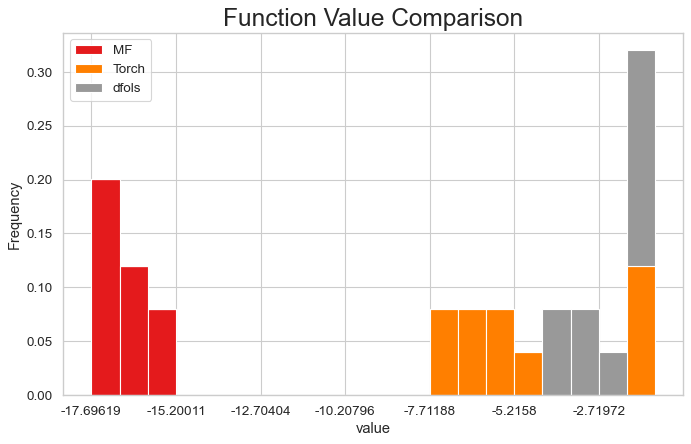

In [634]:
df = compare

# Prepare data
x_var = 'value'
groupby_var = 'method'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]


# Draw
plt.figure(figsize=(10, 6), dpi=80)
colors = [plt.cm.Set1(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals,
                            20,
                            stacked=True,
                            density=True,
                            color=colors[:len(vals)])

# Decoration
plt.legend({
    group: col
    for group, col in zip(
        np.unique(df[groupby_var]).tolist(), colors[:len(vals)])
})
plt.title("Function Value Comparison",
          fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
#plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b, 5) for b in bins[::3]])
plt.savefig("./draft/valuecompare2.png")
plt.show()

In [853]:
x0temp=np.random.uniform(low=-5,high=5,size=2)
test.x0=x0temp
solve=MS.MS(test)
solve.ifprint=0
timeused,value,xstar=solve.Optimize()

[-3960.48294876  2292.35021129] 6.049664409802121e+28 10000.0


In [983]:
compare =pd.DataFrame(columns=('idx','convergence','time',"initialx","initialy",'point','value'))
import Manifold_Sampling as MS
importlib.reload(LSNO)
importlib.reload(MS)
problem="Brown"
n=2
test=LSNO.LSNO(problem=problem,n=n)
test.setup()
for i in range(5000):
    x0temp=np.random.uniform(low=-3,high=3,size=2)
    test.x0=x0temp
    solve=MS.MS(test)
    solve.searchstep=20
    solve.ifprint=0
    timeused,value,xstar=solve.Optimize()
    compare=compare.append(pd.DataFrame({'idx':[i],'convergence':[classification(xstar)],'time':[timeused],'initialx':[x0temp[0]],'initialy':[x0temp[1]],'point':[xstar],'value':[value]}),ignore_index=True)

<module 'LSNO' from '/Users/mayuheng/Documents/GitHub/Manifold_Sampling/LSNO.py'>

<module 'Manifold_Sampling' from '/Users/mayuheng/Documents/GitHub/Manifold_Sampling/Manifold_Sampling.py'>

[5799.02367903  845.48495309] 1.2787786606770467e+30 10000.0
[-3725.16877536   864.50734075] 3.7073142911651754e+28 10000.0
[-8712.79187558   862.37788127] 3.3207714446475725e+31 10000.0
[7.52764956e-08 1.00000000e+00] -0.36787913683615103 1.2050410548845864e-07
[5835.84481915  852.12742803] 1.3451986250730975e+30 10000.0
[2779.43081946  883.93788614] 3.5599849974276305e+27 10000.0
[2907.69818523  867.67940392] 5.107593353118475e+27 10000.0
[-4680.26594471   861.34227328] 2.3019502930609566e+29 10000.0
[-6770.44838252   855.00882082] 4.414759485110482e+30 10000.0
[2705.09220528  852.01306271] 2.8658556020318504e+27 10000.0
[-2.21339599e-09 -4.92902272e-14] 8.853583643997354e-09 3.6802418269826223e-09
[ 2.03583955e-09 -1.68275226e-12] 8.143357987933086e-09 3.028361876743378e-09
[-1.18760376e-07  1.00000025e+00] -0.36787779579827584 1.0845369493961277e-06
[2.00242987 3.01299694] 0.02277506859255204 0.0023718823083293318
[-5351.96790975   853.57232468] 6.730638070424047e+29 10000.0
[-2.22

KeyboardInterrupt: 

In [897]:
comparesave

,idx,convergence,time,initial,point,value
0,0,0,3.091180,"[1.3237568179649273, 0.3806530300874922]","[1.8028593840794958e-10, -1.0000000005177523]",-3.678794e-01
1,1,0,0.553904,"[1.0951410275864975, 1.2665302394239575]","[1.9038000992591498e-09, 4.027870244974733e-08]",7.615202e-09
2,2,0,4.040789,"[0.7271776463700954, 1.4497044742529734]","[-1.0836281542295843e-09, 1.000000000082763]",-3.678794e-01
3,3,0,17.691286,"[-1.2050055461372926, 1.594847479201075]","[3.5313799858179177e-07, 1.0000005149520559]",-3.678756e-01
4,4,0,0.605505,"[-1.527227346553542, 1.9949397923532537]","[-9.455024817507703e-10, -9.588327660379995e-11]",3.782010e-09
...,...,...,...,...,...,...
991,991,0,12.347113,"[0.46868296898490813, 2.589257737296893]","[-5742.927825092526, 2318.024309589836]",1.182891e+30
992,992,0,19.774743,"[2.2184499380469607, 1.2556476757758297]","[6.245641045622458e-10, 0.9999999907453252]",-3.678794e-01
993,993,0,13.942357,"[-2.401647500961269, 0.6906992128192893]","[5408.602569453342, 2291.6910309297086]",7.320563e+29
994,994,0,17.167220,"[-2.7914645636382374, 0.3959086090814772]","[-5410.868082236069, 2255.8299052751713]",7.345168e+29


In [936]:
compare["initialy"]=0.0

In [970]:
compare

,idx,convergence,time,initial,point,value,ifconvergence,initialx,initialy,legend
0,0,2,3.091180,"[1.3237568179649273, 0.3806530300874922]","[1.8028593840794958e-10, -1.0000000005177523]",-3.678794e-01,True,1.323757,0.380653,"(0,-1)"
1,1,0,0.553904,"[1.0951410275864975, 1.2665302394239575]","[1.9038000992591498e-09, 4.027870244974733e-08]",7.615202e-09,True,1.095141,1.266530,"(0,0)"
2,2,1,4.040789,"[0.7271776463700954, 1.4497044742529734]","[-1.0836281542295843e-09, 1.000000000082763]",-3.678794e-01,True,0.727178,1.449704,"(0,1)"
3,3,1,17.691286,"[-1.2050055461372926, 1.594847479201075]","[3.5313799858179177e-07, 1.0000005149520559]",-3.678756e-01,True,-1.205006,1.594847,"(0,1)"
4,4,0,0.605505,"[-1.527227346553542, 1.9949397923532537]","[-9.455024817507703e-10, -9.588327660379995e-11]",3.782010e-09,True,-1.527227,1.994940,"(0,0)"
...,...,...,...,...,...,...,...,...,...,...
991,991,-1,12.347113,"[0.46868296898490813, 2.589257737296893]","[-5742.927825092526, 2318.024309589836]",1.182891e+30,False,0.468683,2.589258,Divergence
992,992,1,19.774743,"[2.2184499380469607, 1.2556476757758297]","[6.245641045622458e-10, 0.9999999907453252]",-3.678794e-01,True,2.218450,1.255648,"(0,1)"
993,993,-1,13.942357,"[-2.401647500961269, 0.6906992128192893]","[5408.602569453342, 2291.6910309297086]",7.320563e+29,False,-2.401648,0.690699,Divergence
994,994,-1,17.167220,"[-2.7914645636382374, 0.3959086090814772]","[-5410.868082236069, 2255.8299052751713]",7.345168e+29,False,-2.791465,0.395909,Divergence


In [985]:
compare["legend"]="a"
for i in range(996):
    if compare["convergence"][i]==-1:
        compare["legend"][i]="Divergence"
    elif compare["convergence"][i]==0:
        compare["legend"][i]="(0,0)"
    elif compare["convergence"][i]==1:
        compare["legend"][i]="(0,1)"
    elif compare["convergence"][i]==2:
        compare["legend"][i]="(0,-1)"
    elif compare["convergence"][i]==3:
        compare["legend"][i]="(2,3)"
    elif compare["convergence"][i]==4:
        compare["legend"][i]="(2,5)"

<ipython-input-985-76fac6c49c18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["legend"][i]="Divergence"
<ipython-input-985-76fac6c49c18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["legend"][i]="(0,1)"
<ipython-input-985-76fac6c49c18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["legend"][i]="(0,0)"
<ipython-input-985-76fac6c49c18>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy o

KeyError: 26

In [939]:
comparesave=compare.copy()

In [906]:
def classification(x):
    x1=np.array([0,0])
    x2=np.array([0,1])
    x3=np.array([0,-1])
    x4=np.array([2,3])
    x5=np.array([2,5])
    if (x-x1).dot(x-x1)<0.001:
        return 0
    elif (x-x2).dot(x-x2)<0.001:
        return 1
    elif (x-x3).dot(x-x3)<0.001:
        return 2
    elif (x-x4).dot(x-x4)<0.001:
        return 3
    elif (x-x5).dot(x-x5)<0.001:
        return 4
    else:
        return -1

In [858]:
solve.xsave.shape

(2, 3001)

array([-3.86536740e+00, -3.86536740e+00, -3.86536740e+00, ...,
        2.03951676e+03, -7.96048294e+03, -5.96048294e+03])

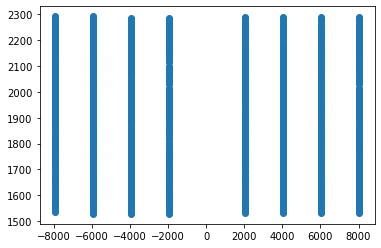

In [863]:
#oscilation behavior 
# try cg plot
import matplotlib.pyplot as plt
plt.plot(solve.xsave[0,2000:],solve.xsave[1,2000:],'o')
plt.show()#

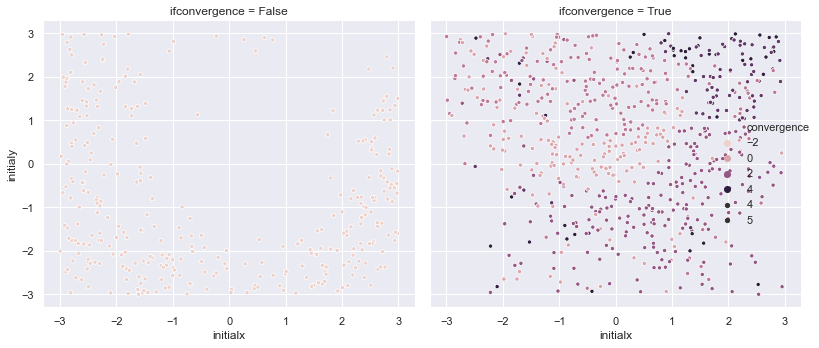

In [966]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats,integrate
import pandas as pd

sns.set(style="darkgrid")

g=sns.relplot(x='initialx', y='initialy', hue='convergence', col="ifconvergence",data=compare,size=5) #将sex这列的数据按照不同的属性分开画，同时加入条件是不是抽烟的

g.add_legend() #显示图例

plt.show()





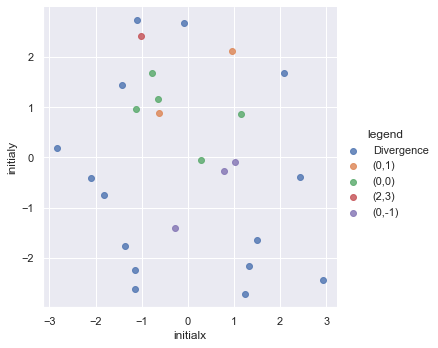

In [986]:
sns.lmplot('initialx','initialy',compare,hue='legend', fit_reg=False)
plt.savefig("./draft/convergence2.png")

In [979]:
problem="Brown"
n=2
test=LSNO.LSNO(problem=problem,n=n)
test.setup()
test.x0=np.random.uniform(low=-3,high=3,size=2)
solve=MS.MS(test)
solve.max_iter=10000
timeused,value,xstar=solve.Optimize()


1 4802.707594459684 1000.0
2 4802.707594459684 500.0
3 4802.707594459684 250.0
4 4802.707594459684 125.0
5 4802.707594459684 62.5
6 4802.707594459684 31.25
7 4802.707594459684 15.625
8 4802.707594459684 7.8125
9 4802.707594459684 3.90625
10 390.9251460030587 5.859375
11 11416.077760432701 8.7890625
12 7.171943019924015 13.18359375
13 193742960.59379435 19.775390625
14 4471175.019317633 29.6630859375
15 61754569133.95862 44.49462890625
16 993024866.7180531 66.741943359375
17 62527988713048.23 100.1129150390625
18 1389592950973.5647 150.16937255859375
19 3.513099908987008e+16 225.25405883789062
20 716089437626964.0 337.88108825683594
21 2.494304972706822e+19 506.8216323852539
22 5.35096729794283e+17 760.2324485778809
23 1.585975239189781e+22 1140.3486728668213
24 3.336782910377829e+20 1710.523009300232
25 1.0573958498245275e+25 2565.784513950348
26 2.245687203222749e+23 3848.676770925522
27 6.900252647972814e+27 5773.015156388283
28 1.4596147077372031e+26 8659.522734582424
29 4.545637419

478 3.149115539283955e+30 10000.0
479 1.6530836961841015e+29 10000.0
480 1.4795617699898426e+27 10000.0
481 1.0113352454582543e+31 10000.0
482 8.489875726096679e+29 10000.0
483 2.3011713139687547e+28 10000.0
484 2.6944676353928076e+25 10000.0
485 2.7004774888320825e+31 10000.0
486 3.149112216857875e+30 10000.0
487 1.6530805247047258e+29 10000.0
488 1.4795539152531734e+27 10000.0
489 1.0113351676257828e+31 10000.0
490 8.489872913125794e+29 10000.0
491 2.3011683664321954e+28 10000.0
492 3.14911140725659e+30 10000.0
493 1.653079491304503e+29 10000.0
494 1.4795504845434717e+27 10000.0
495 1.0113347588711693e+31 10000.0
496 8.489867008912168e+29 10000.0
497 2.3011647372668336e+28 10000.0
498 2.694421234459448e+25 10000.0
499 2.7004752750292645e+31 10000.0
500 3.149108096014456e+30 10000.0
501 1.6530763311341736e+29 10000.0
502 1.4795426600449407e+27 10000.0
503 1.0113346846587471e+31 10000.0
504 8.489864248372037e+29 10000.0
505 2.301161821594702e+28 10000.0
506 2.6943959930437687e+25 10000

952 8.489593034103059e+29 10000.0
953 2.300954130059092e+28 10000.0
954 2.6929137481069164e+25 10000.0
955 2.700399845983378e+31 10000.0
956 3.148968617845971e+30 10000.0
957 1.6529354808866404e+29 10000.0
958 1.4791680643496377e+27 10000.0
959 1.0113197666878525e+31 10000.0
960 8.48959028141716e+29 10000.0
961 2.30095121596553e+28 10000.0
962 2.6928885091668646e+25 10000.0
963 2.700397978125101e+31 10000.0
964 3.148965316797399e+30 10000.0
965 1.652932328267266e+29 10000.0
966 1.4791602513390818e+27 10000.0
967 1.0113196827953583e+31 10000.0
968 8.489587402582927e+29 10000.0
969 1.652931757872597e+29 10000.0
970 1.4791579272756028e+27 10000.0
971 1.0113192637654813e+31 10000.0
972 8.48958162950068e+29 10000.0
973 2.3009448964827606e+28 10000.0
974 3.148964198758364e+30 10000.0
975 1.652930729713146e+29 10000.0
976 1.479154516651387e+27 10000.0
977 1.011318851578046e+31 10000.0
978 8.489575686789644e+29 10000.0
979 2.3009412512239347e+28 10000.0
980 3.1489633662849607e+30 10000.0
981 1

1415 2.7003136143875654e+31 10000.0
1416 3.1488117884501396e+30 10000.0
1417 1.6527802168379805e+29 10000.0
1418 1.4787649929853165e+27 10000.0
1419 1.0113077455574401e+31 10000.0
1420 8.4893457652283e+29 10000.0
1421 2.300749784626235e+28 10000.0
1422 2.6913731239140346e+25 10000.0
1423 2.700311742138638e+31 10000.0
1424 3.1488084805689596e+30 10000.0
1425 1.6527770588226222e+29 10000.0
1426 1.4787571713736635e+27 10000.0
1427 1.0113076751788051e+31 10000.0
1428 8.48934305215747e+29 10000.0
1429 2.3007468930765447e+28 10000.0
1430 3.1488076557077906e+30 10000.0
1431 1.652776017902723e+29 10000.0
1432 1.4787537459890585e+27 10000.0
1433 1.0113072714404749e+31 10000.0
1434 8.48933721146327e+29 10000.0
1435 2.3007432960228677e+28 10000.0
1436 2.6913271752951947e+25 10000.0
1437 2.700309521403035e+31 10000.0
1438 3.148804354081237e+30 10000.0
1439 1.652772868121529e+29 10000.0
1440 1.478745954283292e+27 10000.0
1441 1.0113071945210718e+31 10000.0
1442 8.489334424309577e+29 10000.0
1443 2.

1876 1.478379147100382e+27 10000.0
1877 1.0112938325668582e+31 10000.0
1878 8.489081671229908e+29 10000.0
1879 2.300541913070175e+28 10000.0
1880 2.689859482440711e+25 10000.0
1881 2.700232199772357e+31 10000.0
1882 3.14866234633102e+30 10000.0
1883 1.6526306164463988e+29 10000.0
1884 1.4783713432503985e+27 10000.0
1885 1.0112937564977268e+31 10000.0
1886 8.48907889121325e+29 10000.0
1887 2.3005389920514856e+28 10000.0
1888 2.689834280030156e+25 10000.0
1889 2.70023032423371e+31 10000.0
1890 3.148659033281994e+30 10000.0
1891 1.6526274544395473e+29 10000.0
1892 1.4783635151173084e+27 10000.0
1893 1.0112936831212766e+31 10000.0
1894 8.489076139207829e+29 10000.0
1895 2.300536080222876e+28 10000.0
1896 2.6898090811799563e+25 10000.0
1897 2.7002284406721915e+31 10000.0
1898 3.148655707487262e+30 10000.0
1899 1.6526242821618034e+29 10000.0
1900 1.4783556689369308e+27 10000.0
1901 1.0112936127045143e+31 10000.0
1902 8.489073420002984e+29 10000.0
1903 2.3005331810259127e+28 10000.0
1904 2.68

2336 3.148515942750068e+30 10000.0
2337 1.6524841937901884e+29 10000.0
2338 1.477986523786046e+27 10000.0
2339 1.01128025489751e+31 10000.0
2340 8.488820157129819e+29 10000.0
2341 2.300334003322539e+28 10000.0
2342 2.688334948019306e+25 10000.0
2343 2.7001504972035616e+31 10000.0
2344 3.148512619915168e+30 10000.0
2345 1.65248102502675e+29 10000.0
2346 1.477978689620698e+27 10000.0
2347 1.01128018096827e+31 10000.0
2348 8.488817396424904e+29 10000.0
2349 2.3003310861114134e+28 10000.0
2350 2.688309713513491e+25 10000.0
2351 2.70014860319892e+31 10000.0
2352 3.148509276970965e+30 10000.0
2353 1.652477837895539e+29 10000.0
2354 1.477970811507818e+27 10000.0
2355 1.0112801161865343e+31 10000.0
2356 8.488814739626348e+29 10000.0
2357 2.300328211749498e+28 10000.0
2358 2.6882845973399483e+25 10000.0
2359 2.7001467276820996e+31 10000.0
2360 3.1485059649159433e+30 10000.0
2361 1.6524746782606506e+29 10000.0
2362 1.4779629955120018e+27 10000.0
2363 1.0112800483037448e+31 10000.0
2364 8.4888120

2796 2.6868426498786334e+25 10000.0
2797 2.700073709108397e+31 10000.0
2798 3.148371141231455e+30 10000.0
2799 1.65233877084458e+29 10000.0
2800 1.4776024461086465e+27 10000.0
2801 1.0112659695223067e+31 10000.0
2802 8.488551805114403e+29 10000.0
2803 2.300124338448963e+28 10000.0
2804 3.148370305281326e+30 10000.0
2805 1.6523377203334737e+29 10000.0
2806 1.4775990016624957e+27 10000.0
2807 1.011265560320345e+31 10000.0
2808 8.488545892013654e+29 10000.0
2809 2.3001207018423354e+28 10000.0
2810 2.6867965691097096e+25 10000.0
2811 2.700071481085753e+31 10000.0
2812 3.1483670009128513e+30 10000.0
2813 1.6523345657782265e+29 10000.0
2814 8.488546340344457e+29 10000.0
2815 2.3001194927805816e+28 10000.0
2816 3.1483659819375087e+30 10000.0
2817 1.6523335027196855e+29 10000.0
2818 1.4775882576078242e+27 10000.0
2819 1.0112653218133336e+31 10000.0
2820 8.488540394979006e+29 10000.0
2821 2.3001158437740408e+28 10000.0
2822 2.6867583813959046e+25 10000.0
2823 2.7000691083459413e+31 10000.0
2824

3257 2.6999938784446346e+31 10000.0
3258 3.1482245550846604e+30 10000.0
3259 1.6521919755377582e+29 10000.0
3260 1.4772161120501805e+27 10000.0
3261 1.0112521423003028e+31 10000.0
3262 8.488288626822428e+29 10000.0
3263 2.2999168196708235e+28 10000.0
3264 3.148223719925088e+30 10000.0
3265 1.6521909259998336e+29 10000.0
3266 1.4772126713215335e+27 10000.0
3267 1.0112517322956813e+31 10000.0
3268 8.488282704014605e+29 10000.0
3269 2.2999131787122324e+28 10000.0
3270 2.685284974591213e+25 10000.0
3271 2.699991634818554e+31 10000.0
3272 3.148220389839569e+30 10000.0
3273 1.65218774992459e+29 10000.0
3274 1.4772048174493313e+27 10000.0
3275 1.0112516543048429e+31 10000.0
3276 8.488279887547839e+29 10000.0
3277 2.2999102289411356e+28 10000.0
3278 2.685259596335212e+25 10000.0
3279 2.69998976290128e+31 10000.0
3280 3.148217080166719e+30 10000.0
3281 1.652184587724001e+29 10000.0
3282 1.4771969815506009e+27 10000.0
3283 1.0112515836392999e+31 10000.0
3284 8.488277166721612e+29 10000.0
3285 2.

3717 1.6520432426851375e+29 10000.0
3718 1.476827212371186e+27 10000.0
3719 1.011239251071591e+31 10000.0
3720 1.476825515486893e+27 10000.0
3721 1.0112388664614285e+31 10000.0
3722 8.488031312646256e+29 10000.0
3723 2.299711398024849e+28 10000.0
3724 2.683796639345306e+25 10000.0
3725 2.6999103961218425e+31 10000.0
3726 3.1480718452957716e+30 10000.0
3727 1.65203974293352e+29 10000.0
3728 1.4768177175092463e+27 10000.0
3729 1.0112387898461551e+31 10000.0
3730 8.488028526266972e+29 10000.0
3731 2.2997084744733992e+28 10000.0
3732 2.683771471349217e+25 10000.0
3733 2.699908533644323e+31 10000.0
3734 3.148068553143559e+30 10000.0
3735 1.652036598276228e+29 10000.0
3736 1.4768099265010197e+27 10000.0
3737 1.0112387080829062e+31 10000.0
3738 8.488025677598089e+29 10000.0
3739 2.2997055208439807e+28 10000.0
3740 3.1480677422418415e+30 10000.0
3741 1.6520355651304013e+29 10000.0
3742 1.4768065044553523e+27 10000.0
3743 1.0112382941279169e+31 10000.0
3744 8.488019709720672e+29 10000.0
3745 2.

4177 2.6998292153332555e+31 10000.0
4178 3.1479235895734664e+30 10000.0
4179 1.6518922449069308e+29 10000.0
4180 1.4764326897586138e+27 10000.0
4181 1.011226275594273e+31 10000.0
4182 8.487782006607724e+29 10000.0
4183 2.299509546341191e+28 10000.0
4184 3.147922773104151e+30 10000.0
4185 1.6518912096539506e+29 10000.0
4186 1.4764292736603483e+27 10000.0
4187 1.0112258649636122e+31 10000.0
4188 8.487776081591417e+29 10000.0
4189 2.299505908995725e+28 10000.0
4190 3.147921954079988e+30 10000.0
4191 1.6518901720683172e+29 10000.0
4192 1.4764258509598744e+27 10000.0
4193 1.0112254556482058e+31 10000.0
4194 8.487770171857704e+29 10000.0
4195 2.299502278701972e+28 10000.0
4196 2.6822572302152916e+25 10000.0
4197 2.6998266637263395e+31 10000.0
4198 3.1479186668426096e+30 10000.0
4199 1.6518870324399645e+29 10000.0
4200 1.4764180754282284e+27 10000.0
4201 1.0112253797923523e+31 10000.0
4202 8.487767399449986e+29 10000.0
4203 2.2994993660449076e+28 10000.0
4204 2.682232153567689e+25 10000.0
420

4638 1.4760420955171897e+27 10000.0
4639 1.0112137408016044e+31 10000.0
4640 8.487533909552978e+29 10000.0
4641 2.2993087324725435e+28 10000.0
4642 3.1477720901337796e+30 10000.0
4643 1.6517414220767795e+29 10000.0
4644 1.476038705899736e+27 10000.0
4645 1.011213329406731e+31 10000.0
4646 8.487527981190332e+29 10000.0
4647 2.2993050987050553e+28 10000.0
4648 2.68078915042283e+25 10000.0
4649 2.6997444387756965e+31 10000.0
4650 3.1477687936817435e+30 10000.0
4651 1.6517382745203168e+29 10000.0
4652 1.4760309143152974e+27 10000.0
4653 1.0112132549747186e+31 10000.0
4654 8.48752522284216e+29 10000.0
4655 2.299302190266382e+28 10000.0
4656 2.6807640720544713e+25 10000.0
4657 2.6997425548219538e+31 10000.0
4658 3.147765468179834e+30 10000.0
4659 1.651735103869004e+29 10000.0
4660 1.476023080128773e+27 10000.0
4661 1.0112131781958003e+31 10000.0
4662 8.487522424916767e+29 10000.0
4663 2.2992992530969285e+28 10000.0
4664 2.6807388029807993e+25 10000.0
4665 2.6997407034688432e+31 10000.0
4666 

5098 1.47565360320003e+27 10000.0
5099 1.0111997456937664e+31 10000.0
5100 8.487268074693162e+29 10000.0
5101 2.2990994427816853e+28 10000.0
5102 2.6792892339708835e+25 10000.0
5103 2.6996645235696275e+31 10000.0
5104 3.147622197987939e+30 10000.0
5105 1.6515916528538897e+29 10000.0
5106 1.4756457619254433e+27 10000.0
5107 1.0111996746399028e+31 10000.0
5108 8.487265346450723e+29 10000.0
5109 2.299096539034005e+28 10000.0
5110 2.67926409129504e+25 10000.0
5111 2.6996626209923356e+31 10000.0
5112 3.1476188419753105e+30 10000.0
5113 1.6515884561306412e+29 10000.0
5114 1.4756378746842018e+27 10000.0
5115 1.011199611832487e+31 10000.0
5116 8.487262710201372e+29 10000.0
5117 2.2990936730132333e+28 10000.0
5118 3.1476180026037254e+30 10000.0
5119 1.651587402359259e+29 10000.0
5120 1.4756344242174172e+27 10000.0
5121 1.0111992030864877e+31 10000.0
5122 8.487256800291234e+29 10000.0
5123 2.2990900361992433e+28 10000.0
5124 2.6792180522450006e+25 10000.0
5125 2.69966039816446e+31 10000.0
5126 3

5558 1.4752532790570674e+27 10000.0
5559 1.0111879772702714e+31 10000.0
5560 8.487027223998374e+29 10000.0
5561 2.2989003410579253e+28 10000.0
5562 2.6777922139745596e+25 10000.0
5563 2.6995785038314363e+31 10000.0
5564 3.147465889266932e+30 10000.0
5565 1.6514370899020065e+29 10000.0
5566 8.48702771673226e+29 10000.0
5567 2.298899146003025e+28 10000.0
5568 2.677775067861549e+25 10000.0
5569 2.6995764500163344e+31 10000.0
5570 3.1474623932997663e+30 10000.0
5571 1.651433917214e+29 10000.0
5572 1.4752381344466806e+27 10000.0
5573 1.0111880793344807e+31 10000.0
5574 8.48702493911697e+29 10000.0
5575 2.29889622708955e+28 10000.0
5576 2.6777499590947895e+25 10000.0
5577 2.699574595968546e+31 10000.0
5578 3.147459115077967e+30 10000.0
5579 1.651430785029636e+29 10000.0
5580 1.4752303755171294e+27 10000.0
5581 1.0111879965091126e+31 10000.0
5582 8.487022082996196e+29 10000.0
5583 2.2988932754283793e+28 10000.0
5584 3.1474582959354634e+30 10000.0
5585 1.6514297457831846e+29 10000.0
5586 1.475

6018 8.486807751401482e+29 10000.0
6019 2.298710022343734e+28 10000.0
6020 2.676316442316138e+25 10000.0
6021 2.699487628146134e+31 10000.0
6022 3.147302094075596e+30 10000.0
6023 1.651276736770954e+29 10000.0
6024 1.4748353458359477e+27 10000.0
6025 1.0111780340726219e+31 10000.0
6026 8.48680498905836e+29 10000.0
6027 2.2987071018895227e+28 10000.0
6028 3.147301280072065e+30 10000.0
6029 1.6512757020666643e+29 10000.0
6030 1.4748319267108295e+27 10000.0
6031 1.011177624609569e+31 10000.0
6032 8.48679907771744e+29 10000.0
6033 2.2987034715951824e+28 10000.0
6034 2.676270366581541e+25 10000.0
6035 2.699485407446206e+31 10000.0
6036 3.1472979642330426e+30 10000.0
6037 1.6512725392791863e+29 10000.0
6038 1.474824109222719e+27 10000.0
6039 1.0111775525384211e+31 10000.0
6040 8.486796341739294e+29 10000.0
6041 1.6512719576351715e+29 10000.0
6042 1.4748217833498544e+27 10000.0
6043 1.0111771383508535e+31 10000.0
6044 8.486790628058771e+29 10000.0
6045 2.2986972509842157e+28 10000.0
6046 3.14

6479 2.6994087534151593e+31 10000.0
6480 3.147156817268351e+30 10000.0
6481 1.6511307384275327e+29 10000.0
6482 1.4744497228825838e+27 10000.0
6483 1.0111634892269406e+31 10000.0
6484 8.486532927502733e+29 10000.0
6485 2.298495242897132e+28 10000.0
6486 2.674765749336393e+25 10000.0
6487 2.6994068774284487e+31 10000.0
6488 3.147153502998585e+30 10000.0
6489 1.6511275752353458e+29 10000.0
6490 1.4744419001370237e+27 10000.0
6491 1.0111634160187111e+31 10000.0
6492 8.48653017573875e+29 10000.0
6493 2.298492330973822e+28 10000.0
6494 2.674740625560472e+25 10000.0
6495 2.6994049884098196e+31 10000.0
6496 3.147150168545049e+30 10000.0
6497 1.651124396300907e+29 10000.0
6498 1.4744340496450177e+27 10000.0
6499 1.0111633467344417e+31 10000.0
6500 8.486527466356414e+29 10000.0
6501 2.298489434916945e+28 10000.0
6502 3.1471493480838024e+30 10000.0
6503 1.65112335771607e+29 10000.0
6504 1.4744306277903756e+27 10000.0
6505 1.0111629388565307e+31 10000.0
6506 8.486521574403115e+29 10000.0
6507 2.2

In [982]:
solve.xsave[:,:100].T

array([[-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.95542150e+00,  5.17019205e-01],
       [-2.19549776e+00,  6.98313124e-01],
       [ 3.51355460e+00,  2.01702330e+00],
       [ 1.80577042e+00,  1.60063647e+00],
       [-1.10649084e+01,  4.45594217e+00],
       [-7.11384149e+00,  4.63402408e+00],
       [ 2.24768226e+01,  6.70556092e+00],
       [ 1.35800795e+01,  6.90264648e+00],
       [-5.31166625e+01,  9.35857796e+00],
       [-3.30949634e+01,  9.54670845e+00],
       [ 1.17057322e+02,  1.18120470e+01],
       [ 7.20069219e+01,  1.20047310e+01],
       [-2.65865997e+02,  1.43543636e+01],
       [-1.64501850e+02,  1.45454115e+01],
       [ 5.

In [1185]:
# -*- coding: utf-8 -*-
import torch
import math
nntimesave=[]
nnvaluesave=[]
timestart=time.time()
# Create Tensors to hold input and outputs.

y = torch.from_numpy(data[:,-1].reshape(-1,1))
y=y.float()
# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).

xx = torch.from_numpy(data[:,:-1])
xx=xx.float()
# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(10, 10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(200000):
    
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        nntimesave=np.append(nntimesave,time.time()-timestart)
        nnvaluesave=np.append(nnvaluesave,sum(abs(y_pred.detach().numpy().ravel()-data[:,-1])))
        print(t, sum(abs(y_pred.detach().numpy().ravel()-data[:,-1])))

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.


99 370.1951889774642
199 369.2796101129494
299 368.2606424818849
399 367.18866758599034
499 366.0566348712062
599 364.8799874465083
699 363.67212398173973
799 362.45078083828656
899 361.2203324432727
999 359.97423355982266
1099 358.7152669201847
1199 357.44534532681666
1299 356.1758158310991
1399 354.8974759310227
1499 353.6232598485635
1599 352.354334774156
1699 351.0876803572372
1799 349.82331090696766
1899 348.56026666142657
1999 347.2895972607345
2099 346.01168124892075
2199 344.760428048517
2299 343.5202217442057
2399 342.30917504342654
2499 341.0926475739704
2599 339.8691268778072
2699 338.64653217863685
2799 337.4388186938727
2899 336.22488293867946
2999 335.0050273395741
3099 333.7795900486076
3199 332.5645933711594
3299 331.36781328410467
3399 330.16848787159284
3499 328.96533421665987
3599 327.7613224510987
3699 326.5764024279859
3799 325.3918410263803
3899 324.22754650727046
3999 323.0758715660883
4099 321.9230183006836
4199 320.7695266844345
4299 319.6158882619454
4399 318.

66999 246.14855009621579
67099 246.14662294393975
67199 246.14469431644875
67299 246.1427694738527
67399 246.14083880490261
67499 246.1389194757362
67599 246.13699882036644
67699 246.13507588511902
67799 246.13315616852242
67899 246.13123955136734
67999 246.12932175702053
68099 246.12741416996914
68199 246.12550163573223
68299 246.1235846609493
68399 246.1216714710613
68499 246.11975153094727
68599 246.11783096498448
68699 246.11591041392285
68799 246.1139970154186
68899 246.11208692497212
68999 246.1101760894676
69099 246.10826814478833
69199 246.10636385089356
69299 246.1044572920223
69399 246.10254346138436
69499 246.1006385863443
69599 246.09874379939038
69699 246.0968498767038
69799 246.09496067768532
69899 246.09307074850994
69999 246.09119157797295
70099 246.08931310779053
70199 246.08743048018414
70299 246.0855520994087
70399 246.0836781889816
70499 246.08181067115265
70599 246.07994693821865
70699 246.07808412915665
70799 246.07623219794232
70899 246.0743667960783
70999 246.07

100199 245.50077788926234
100299 245.4986571261989
100399 245.49653467930426
100499 245.49441452718844
100599 245.4922883103
100699 245.4901612440454
100799 245.48803003526797
100899 245.48590135968794
100999 245.48376672364344
101099 245.48162028587927
101199 245.479477349888
101299 245.4773298839437
101399 245.47518697775473
101499 245.4730415234672
101599 245.47089758909812
101699 245.46874845422377
101799 245.46660025812258
101899 245.46445408857932
101999 245.46230249501338
102099 245.46014751888384
102199 245.45798784888854
102299 245.4558289984571
102399 245.45366698897948
102499 245.45150392151942
102599 245.44933827615847
102699 245.44717201984992
102799 245.44500208295455
102899 245.44283572233786
102999 245.44068254924883
103099 245.43852852679362
103199 245.43643950563967
103299 245.43439606470167
103399 245.43234940511286
103499 245.43033278119512
103599 245.4283762438292
103699 245.4264188570971
103799 245.42444718015142
103899 245.4224405301804
103999 245.42042964827962


163899 243.96774032629875
163999 243.96492315746693
164099 243.9621009967461
164199 243.95927916385082
164299 243.95645375467686
164399 243.95362818159012
164499 243.9508017591372
164599 243.94798451579956
164699 243.9451615206137
164799 243.94233880854992
164899 243.93951569415478
164999 243.9366978547707
165099 243.9338721475735
165199 243.93104854144005
165299 243.9282240114346
165399 243.925398915185
165499 243.92256769455818
165599 243.91974197245983
165699 243.91690969385056
165799 243.91407634235767
165899 243.91124650753883
165999 243.90841220237164
166099 243.90558439411072
166199 243.90275579608826
166299 243.89992417313007
166399 243.89709232665447
166499 243.89425460912136
166599 243.89141674257664
166699 243.8885776094332
166799 243.88574044324307
166899 243.8829009077683
166999 243.88005398131756
167099 243.87720705486683
167199 243.87435904063133
167299 243.87151193536667
167399 243.86866086639313
167499 243.86579506017117
167599 243.86291229642777
167699 243.86002135194

In [1018]:
def nnpredict(parameter):
    z=np.matmul(data[:,:-1],parameter[:100].reshape(10,10))+np.tile(parameter[100:110],442).reshape(442,10)
    x1=sigmoid(z)
    output=np.matmul(x1,parameter[110:120].reshape(-1,1))+parameter[120]
    loss=np.sum((output-data[:,-1])**2)
    return loss

In [1066]:
def nnprime(parameter):
    result=np.zeros(121).reshape(-1,1)
    z=np.matmul(data[:,:-1],parameter[:100].reshape(10,10))+np.tile(parameter[100:110],442).reshape(442,10)
    x1=sigmoid(z)
    output=np.matmul(x1,parameter[110:120].reshape(-1,1))+parameter[120]
    x2=np.sum(x1,axis=0).reshape(-1,1)
    result[120]=2*np.sum(output-data[:,-1])
    result[110:120]=2*np.sum((output-data[:,-1]))*x2
    result[100:110]=2*np.sum((output-data[:,-1]))*x2*(1-x2)
    result[0:100]=(2*np.sum((output-data[:,-1]))*x2*(1-x2)*np.sum(data[:,:-1],axis=0)).T.reshape(-1,1)
    return result

In [1071]:
diabetes=pd.read_excel("./Data/diabetesdata.xlsx")
data=np.array(diabetes)
mu = np.mean(data, axis=0)
sigma = np.std(data, axis=0)
data=(data-mu)/sigma

In [1135]:
class NN(object):
    def __init__(self):
        self.d=10
        self.n=self.d**2+2*self.d+1
        self.m=442
        self.x0=np.random.rand(self.d**2+2*self.d+1)
        self.L_np=10000
        self.L_h=1
        self.lamda=0.01
    def h(self,z):
        return np.linalg.norm(z,ord=1)
    def getD(self,z):
        m=len(z)
        # take L1 norm as example
        if (z!=0).all():
            return np.sign(z).reshape(-1,1)
        else:
            D=np.sign(z).reshape(-1,m)
            for i in range(m):
                j=0
                while(j<len(D)):
                    if D[j,i]==0:
                        temp=D[j,:].reshape(-1,m)
                        temp[0,i]+=1
                        D=np.concatenate((D,temp))
                        temp[0,i]-=2
                        D=np.concatenate((D,temp))
                        D = np.delete(D,j, axis = 0).reshape(-1,m)
                    else:
                        j+=1
            return D.T
    def F(self,parameter):
        z=np.matmul(data[:,:-1],parameter[:self.d*self.d].reshape(self.d,self.d))+np.tile(parameter[self.d**2:(self.d**2+self.d)],442).reshape(442,self.d)
        x1=sigmoid(z)
        output=np.matmul(x1,parameter[(self.d**2+self.d):(self.d**2+2*self.d)].reshape(-1,1))+parameter[(self.d**2+self.d*2)]
        loss=output-data[:,-1].reshape(-1,1)
        return loss.ravel()
    def phi(self,parameter):
        return 0
    def phiprime(self,parameter):
        return 0


In [ ]:
def phi(self,parameter):
        z=np.matmul(data[:,:-1],parameter[:self.d**2].reshape(self.d,self.d))+np.tile(parameter[(self.d**2):(self.d**2+self.d)],442).reshape(442,self.d)
        x1=sigmoid(z)
        output=np.matmul(x1,parameter[(self.d**2+self.d):(self.d**2+self.d*2)].reshape(-1,1))+parameter[self.d**2+2*self.d]
        loss=np.sum((output-data[:,-1])**2)
        return self.lamda*loss
    def phiprime(self,parameter):
        result=np.zeros(self.d**2+2*self.d+1).reshape(-1,1)
        z=np.matmul(data[:,:-1],parameter[:self.d**2].reshape(self.d,self.d))+np.tile(parameter[self.d**2:(self.d**2+self.d)],442).reshape(442,self.d)
        x1=sigmoid(z)
        output=np.matmul(x1,parameter[(self.d**2+self.d):(self.d**2+2*self.d)].reshape(-1,1))+parameter[self.d**2+2*self.d]
        x2=np.sum(x1,axis=0).reshape(-1,1)
        result[(self.d**2+self.d*2)]=2*np.sum(output-data[:,-1])
        result[(self.d**2+self.d):(self.d**2+self.d*2)]=2*np.sum((output-data[:,-1]))*x2
        result[self.d**2:(self.d**2+self.d)]=2*np.sum((output-data[:,-1]))*x2*(1-x2)
        result[0:self.d**2]=(2*np.sum((output-data[:,-1]))*x2*(1-x2)*np.sum(data[:,:-1],axis=0)).T.reshape(-1,1)
        return self.lamda*result

In [1186]:
nn=NN()
solve=MS.MS(nn)
timeused,value,xstar=solve.Optimize()

1 1245.4136447268243 1000.0


<ipython-input-1010-3cbdbdecc9c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


2 1245.4136447268243 500.0
3 1245.4136447268243 250.0
4 1245.4136447268243 125.0
5 1245.4136447268243 62.5
6 1245.4136447268243 31.25
7 1245.4136447268243 15.625
8 1245.4136447268243 7.8125
9 1176.1744193953868 11.71875
10 1176.1744193953868 5.859375
11 1092.8194833393509 8.7890625
12 1092.8194833393509 4.39453125
13 1092.8194833393509 2.197265625
14 725.7326206736943 3.2958984375
15 667.7307539595114 4.94384765625
16 667.7307539595114 2.471923828125
17 343.57367084738985 3.7078857421875
18 330.7929754295999 5.56182861328125
19 330.7929754295999 2.780914306640625
20 314.91699155405615 4.1713714599609375
21 314.91699155405615 2.0856857299804688
22 306.5873110606367 3.128528594970703
23 300.18362638836885 4.692792892456055
24 300.18362638836885 2.3463964462280273
25 296.0759103051879 3.519594669342041
26 296.0759103051879 1.7597973346710205
27 291.40649591760416 2.6396960020065308
28 297.22449851264935 3.959544003009796
29 297.22449851264935 1.979772001504898
30 287.2355039807911 2.96965

404 176.59029438623895 3.076834755209461
405 176.59029438623895 1.5384173776047305
406 172.70626320870855 2.3076260664070958
407 172.70626320870855 1.1538130332035479
408 169.92491369417365 1.7307195498053218
409 189.69919562127143 2.5960793247079827
410 178.33157437120622 3.894118987061974
411 178.33157437120622 1.947059493530987
412 172.8855814083961 2.9205892402964806
413 172.8855814083961 1.4602946201482403
414 172.8855814083961 0.7301473100741201
415 170.3827675381093 1.0952209651111802
416 168.4465010605244 1.6428314476667703
417 178.5750393011442 2.4642471715001553
418 171.8357150786061 3.696370757250233
419 171.8357150786061 1.8481853786251166
420 171.8357150786061 0.9240926893125583
421 169.6216272755147 1.3861390339688375
422 174.5151829149588 2.0792085509532563
423 169.39042837017803 3.1188128264298847
424 169.39042837017803 1.5594064132149423
425 169.39042837017803 0.7797032066074712
426 167.1217329811044 1.1695548099112067
427 176.54856308285264 1.7543322148668101
428 171.

800 160.50328211079133 1.2117647501907052
801 162.90001972730843 1.8176471252860578
802 177.29281753726968 2.7264706879290865
803 167.67328608386336 4.08970603189363
804 167.67328608386336 2.044853015946815
805 167.67328608386336 1.0224265079734074
806 164.3681880284717 1.533639761960111
807 161.67371037334215 2.3004596429401665
808 161.67371037334215 1.1502298214700832
809 161.67371037334215 0.5751149107350416
810 160.609284066429 0.8626723661025624
811 159.5796662301955 1.2940085491538436
812 167.97277267320135 1.9410128237307653
813 163.65534987198586 2.911519235596148
814 163.65534987198586 1.455759617798074
815 161.1323294935403 2.183639426697111
816 161.1323294935403 1.0918197133485554
817 159.57170251327017 1.6377295700228331
818 159.57170251327017 0.8188647850114166
819 159.57170251327017 0.4094323925057083
820 158.8377092357003 0.6141485887585625
821 158.28694959860172 0.9212228831378437
822 161.64219972390524 1.3818343247067655
823 159.51840898942532 2.072751487060148
824 159

1191 158.9266677681453 1.6968362204840244
1192 158.9266677681453 0.8484181102420122
1193 158.9266677681453 0.4242090551210061
1194 158.08332788230618 0.6363135826815092
1195 157.56606129450194 0.9544703740222638
1196 157.2523640845426 1.4317055610333957
1197 157.2523640845426 0.7158527805166979
1198 157.2523640845426 0.35792639025834894
1199 156.73900298531788 0.5368895853875234
1200 156.8321466282953 0.8053343780812852
1201 160.1876512759145 1.2080015671219277
1202 167.06116382988557 1.8120023506828917
1203 161.1676764364993 2.7180035260243374
1204 161.1676764364993 1.3590017630121687
1205 161.1676764364993 0.6795008815060843
1206 158.71948167318092 1.0192513222591266
1207 157.20728183738953 1.52887698338869
1208 175.94585283148444 2.293315475083035
1209 166.89241662366246 3.4399732126245524
1210 166.89241662366246 1.7199866063122762
1211 163.29841849956128 2.579979909468414
1212 163.29841849956128 1.289989954734207
1213 160.87468714415962 1.9349849321013106
1214 160.87468714415962 0.

KeyboardInterrupt: 

In [1190]:
solve.fsave
solve.time

array([1245.41364473, 1245.41364473, 1245.41364473, ...,  157.60556095,
        157.60556095,  157.60556095])

array([1.61992636e+09, 2.71081924e-04, 8.72590542e-02, ...,
       1.40317013e+02, 1.40425444e+02, 1.40527329e+02])

In [1192]:
nntimesave
nnvaluesave

array([6.46588802e-02, 1.17837906e-01, 1.72847748e-01, ...,
       1.45911063e+02, 1.46035889e+02, 1.46145379e+02])

array([370.19518898, 369.27961011, 368.26064248, ..., 242.87007578,
       242.86674724, 242.86341605])

Text(0.5, 1.0, 'L1 Loss Plot')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Loss')

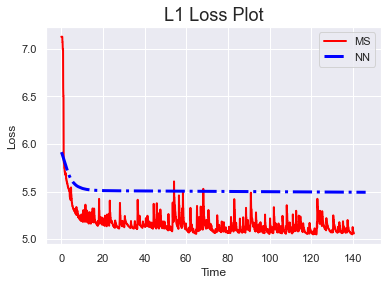

In [1201]:
x_data1 = solve.time[1:]
x_data2=nntimesave
y_data1 = np.log(solve.fsave[1:])
y_data2 = np.log(nnvaluesave)

plt.plot(x_data1,y_data1,color='red',linewidth=2.0,linestyle='-',label="MS")
plt.plot(x_data2,y_data2,color='blue',linewidth=3.0,linestyle='-.',label="NN")
plt.title('L1 Loss Plot', fontsize=18)
plt.xlabel('Time')
plt.ylabel('Loss')
plt.legend()
plt.savefig("./Draft/loss.png")
plt.show()


In [1010]:
def sigmoid(x):
    return 1/(1+np.exp(-x))